In [229]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
df=pd.read_json('flipkart_fashion_products_dataset.json')

In [9]:
df.head()

,_id,actual_price,average_rating,brand,category,crawled_at,description,discount,images,out_of_stock,pid,product_details,seller,selling_price,sub_category,title,url
0,fa8e22d6-c0b6-5229-bb9e-ad52eda39a0a,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:51,Yorker trackpants made from 100% rich combed c...,69% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EA7H5FYZH,"[{'Style Code': '1005COMBO2'}, {'Closure': 'El...",Shyam Enterprises,921,Bottomwear,Solid Men Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
1,893e6980-f2a0-531f-b056-34dd63fe912c,"1,499",3.9,York,Clothing and Accessories,2021-02-10 20:11:52,Yorker trackpants made from 100% rich combed c...,66% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EJZV2UVRZ,"[{'Style Code': '1005BLUE'}, {'Closure': 'Draw...",Shyam Enterprises,499,Bottomwear,Solid Men Blue Track Pants,https://www.flipkart.com/yorker-solid-men-blue...
2,eb4c8eab-8206-59d0-bcd1-a724d96bf74f,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:52,Yorker trackpants made from 100% rich combed c...,68% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EHFCY5Z4Y,"[{'Style Code': '1005COMBO4'}, {'Closure': 'El...",Shyam Enterprises,931,Bottomwear,Solid Men Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
3,3f3f97bb-5faf-57df-a9ff-1af24e2b1045,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:53,Yorker trackpants made from 100% rich combed c...,69% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9ESZZ7YWEF,"[{'Style Code': '1005COMBO3'}, {'Closure': 'El...",Shyam Enterprises,911,Bottomwear,Solid Men Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
4,750caa3d-6264-53ca-8ce1-94118a1d8951,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:53,Yorker trackpants made from 100% rich combed c...,68% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EVXKBSUD7,"[{'Style Code': '1005COMBO1'}, {'Closure': 'Dr...",Shyam Enterprises,943,Bottomwear,"Solid Men Brown, Grey Track Pants",https://www.flipkart.com/yorker-solid-men-brow...


In [12]:
df.drop(['images','url'],axis=1,inplace=True)

In [15]:
df.drop('description',axis=1,inplace=True)

In [22]:
df['discount_in_percentage']=df['discount'].str.replace("% off",'')

In [23]:
df.drop('discount',axis=1,inplace=True)

In [25]:
df.head(n=1)

,_id,actual_price,average_rating,brand,category,crawled_at,out_of_stock,pid,product_details,seller,selling_price,sub_category,title,discount_in_percentage
0,fa8e22d6-c0b6-5229-bb9e-ad52eda39a0a,"2,999",3.9,York,Clothing and Accessories,2021-02-10 20:11:51,False,TKPFCZ9EA7H5FYZH,"[{'Style Code': '1005COMBO2'}, {'Closure': 'El...",Shyam Enterprises,921,Bottomwear,Solid Men Multicolor Track Pants,69


In [30]:
df['actual_price']=df['actual_price'].str.replace(',','')

In [38]:
def remove_comma(value):
    return  value.replace(',','') if isinstance(value,str) else value

In [41]:
df['selling_price']=df['selling_price'].apply(remove_comma)

In [48]:
df.isnull().sum()

_id                       0
actual_price              0
average_rating            0
brand                     0
category                  0
crawled_at                0
out_of_stock              0
pid                       0
product_details           0
seller                    0
selling_price             0
sub_category              0
title                     0
discount_in_percentage    0
dtype: int64

In [50]:
df.isna().sum()

_id                       0
actual_price              0
average_rating            0
brand                     0
category                  0
crawled_at                0
out_of_stock              0
pid                       0
product_details           0
seller                    0
selling_price             0
sub_category              0
title                     0
discount_in_percentage    0
dtype: int64

In [54]:
df[['actual_price','selling_price','discount_in_percentage']]=df[['actual_price','selling_price','discount_in_percentage']].replace('',np.nan)

In [58]:
df=df.dropna(subset=['actual_price','selling_price','discount_in_percentage'])

In [60]:
df[['actual_price','selling_price','discount_in_percentage']]=df[['actual_price','selling_price','discount_in_percentage']].astype(int)

C:\Users\Prem M\AppData\Local\Temp\ipykernel_5628\2231274475.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['actual_price','selling_price','discount_in_percentage']]=df[['actual_price','selling_price','discount_in_percentage']].astype(int)


In [65]:
df['average_rating']=df['average_rating'].replace('',np.nan)

C:\Users\Prem M\AppData\Local\Temp\ipykernel_5628\1678897527.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['average_rating']=df['average_rating'].replace('',np.nan)


In [70]:
df=df.dropna(subset=['average_rating'])

In [71]:
df['average_rating']=df['average_rating'].astype(float)

In [72]:
df.isnull().sum()

_id                       0
actual_price              0
average_rating            0
brand                     0
category                  0
crawled_at                0
out_of_stock              0
pid                       0
product_details           0
seller                    0
selling_price             0
sub_category              0
title                     0
discount_in_percentage    0
dtype: int64

In [73]:
df.shape[0]

26869

In [74]:
df.dtypes

_id                               object
actual_price                       int32
average_rating                   float64
brand                             object
category                          object
crawled_at                datetime64[ns]
out_of_stock                        bool
pid                               object
product_details                   object
seller                            object
selling_price                      int32
sub_category                      object
title                             object
discount_in_percentage             int32
dtype: object

In [77]:
df.describe()

,actual_price,average_rating,crawled_at,selling_price,discount_in_percentage
count,26869.000000,26869.000000,26869,26869.000000,26869.000000
mean,1476.516059,3.641312,2021-02-10 22:57:07.081096960,701.751796,50.281923
min,150.000000,1.000000,2021-02-10 20:11:51,99.000000,1.000000
25%,870.000000,3.300000,2021-02-10 21:32:33,389.000000,40.000000
50%,1299.000000,3.800000,2021-02-10 22:59:28,549.000000,52.000000
75%,1799.000000,4.100000,2021-02-11 00:20:48,824.000000,63.000000
max,12999.000000,5.000000,2021-02-11 01:31:55,7999.000000,87.000000
std,956.356077,0.664691,NaN,527.823998,16.882599


In [80]:
df.columns

Index(['_id', 'actual_price', 'average_rating', 'brand', 'category',
       'crawled_at', 'out_of_stock', 'pid', 'product_details', 'seller',
       'selling_price', 'sub_category', 'title', 'discount_in_percentage'],
      dtype='object')

In [112]:
df.groupby('category').size()
#we have to eliminate toys sections since we dont have sufficient_data
df=df[df['category']!='Toys']

In [113]:
category_discount_avg=df.groupby('category')['discount_in_percentage'].mean().reset_index()

In [114]:
category_discount_avg_sort=category_discount_avg.sort_values(by='discount_in_percentage',ascending=True)

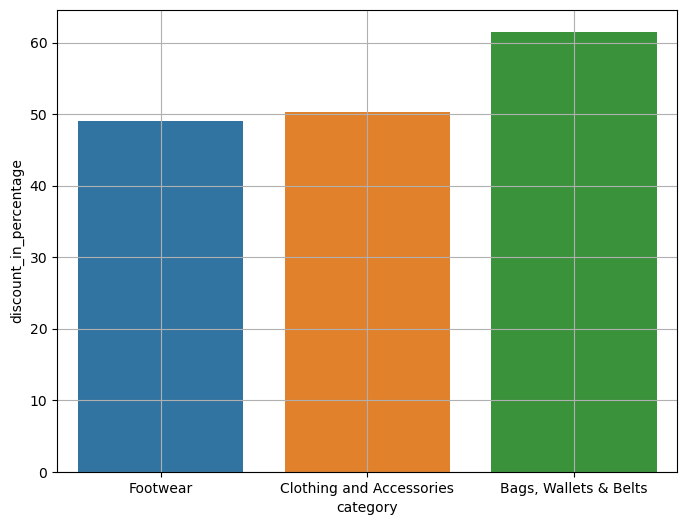

In [115]:
plt.figure(figsize=(8,6))
sns.barplot(x='category',y='discount_in_percentage',data=category_discount_avg_sort)
plt.grid()

In [116]:
rating_category=df.groupby('category')['average_rating'].mean().reset_index()

In [117]:
rating_category_sort=rating_category.sort_values(by='average_rating',ascending=True)

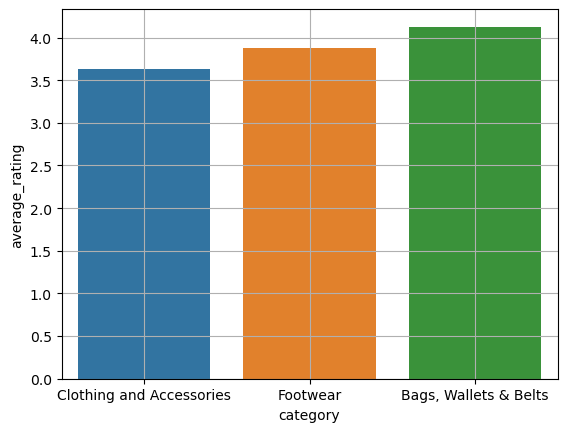

In [118]:
sns.barplot(x='category',y='average_rating',data=rating_category_sort)
plt.grid()

so from this analysis , bags,wallets and belts has highest average discount percentage and high average rating,which is good, there isn't need to deep further

In [121]:
seller_discount=df.groupby('seller')['discount_in_percentage'].mean().reset_index()

In [128]:
seller_discount_sort=seller_discount.sort_values(by='discount_in_percentage',ascending=False)

In [130]:
top_10_sellers_discount=seller_discount_sort.head(n=10)

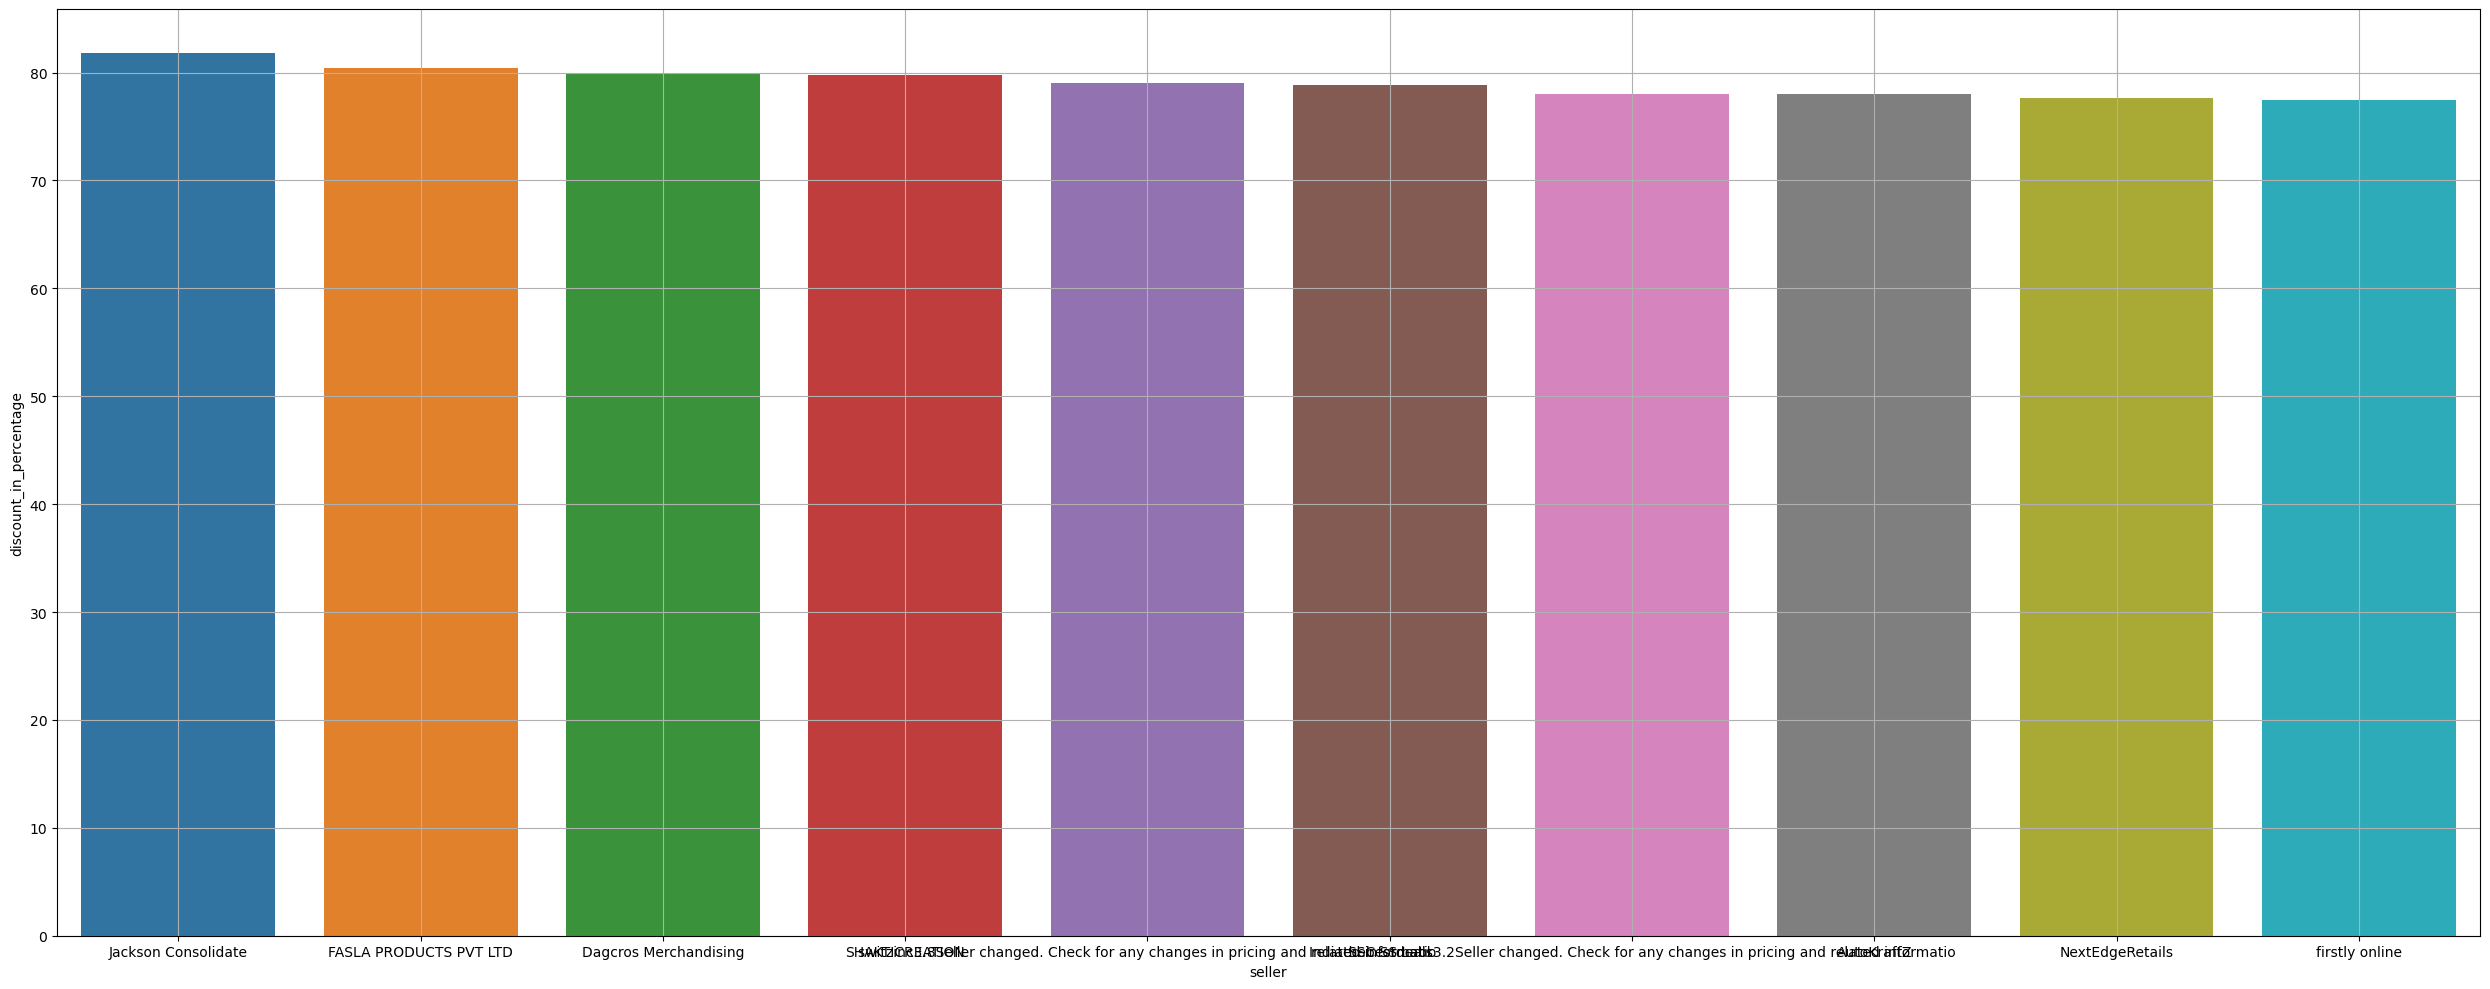

In [140]:
plt.figure(figsize=(25,10))
sns.barplot(x='seller',y='discount_in_percentage',data=top_10_sellers_discount)
plt.tight_layout()
plt.grid()

In [143]:
seller_80_discount=df[df['discount_in_percentage'] >=80]

In [147]:
seller_80_discount.groupby('discount_in_percentage')['seller'].count().reset_index()

,discount_in_percentage,seller
0,80,96
1,81,64
2,82,35
3,83,9
4,84,8
5,85,1
6,86,2
7,87,1


possible interpretation - aggresive price competition

In [148]:
#lets plot histogram to see how discounts are distributed

<Axes: xlabel='discount_in_percentage', ylabel='Count'>

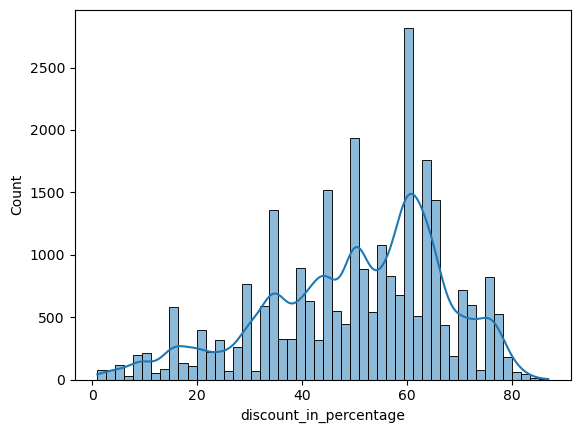

In [149]:
sns.histplot(df['discount_in_percentage'],bins=50,kde=True)

<Axes: >

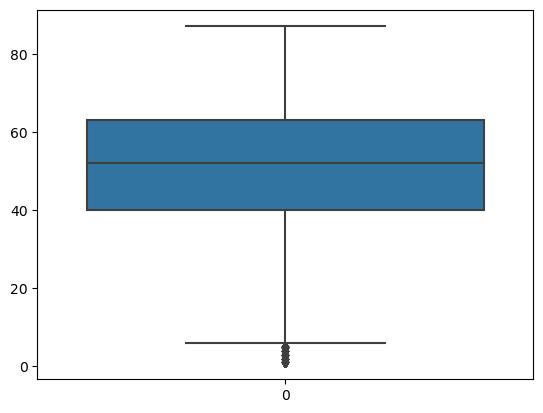

In [150]:
sns.boxplot(df['discount_in_percentage'])

In [152]:
#sweet spot - discount rating is 50-55%

In [154]:
df[['discount_in_percentage','average_rating']].corr()

,discount_in_percentage,average_rating
discount_in_percentage,1.000000,-0.042124
average_rating,-0.042124,1.000000


In [155]:
#there is a weak negative correlation, as discounts increase , ratings slightly decrease

<Axes: xlabel='discount_in_percentage', ylabel='average_rating'>

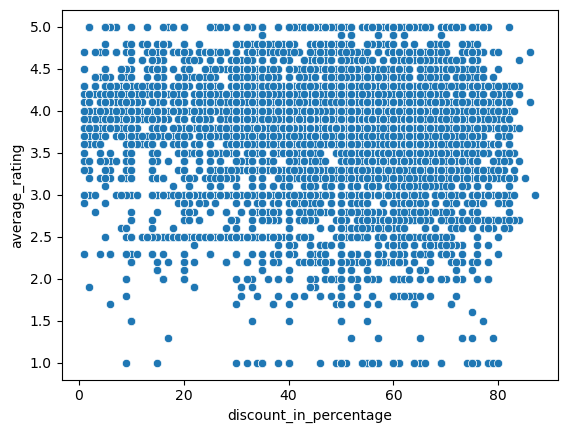

In [156]:
sns.scatterplot(x='discount_in_percentage',y='average_rating',data=df)

products with low and high discounts receives similar ratings

In [160]:
actual_price=df.groupby('category')['actual_price'].sum().reset_index()

In [161]:
discounted_price=df.groupby('category')['selling_price'].sum().reset_index()

In [163]:
revenue_loss=actual_price.merge(discounted_price, on='category')

In [167]:
revenue_loss['loss']=revenue_loss['actual_price'] - revenue_loss['selling_price'] 

In [169]:
revenue_loss['loss_percentage']= (revenue_loss['loss']*100)/revenue_loss['actual_price']

In [170]:
revenue_loss

,category,actual_price,selling_price,loss,loss_percentage
0,"Bags, Wallets & Belts",29330,10599,18731,63.862939
1,Clothing and Accessories,38726811,18366453,20360358,52.574321
2,Footwear,915870,478128,437742,47.795211


In [171]:
revenue_loss['loss'].sum()

20816831

In [172]:
# 2.08 crore ruppes loss

In [187]:
df.head()

,_id,actual_price,average_rating,brand,category,crawled_at,out_of_stock,pid,product_details,seller,selling_price,sub_category,title,discount_in_percentage,year,month_name,day_name
0,fa8e22d6-c0b6-5229-bb9e-ad52eda39a0a,2999,3.9,York,Clothing and Accessories,2021-02-10 20:11:51,False,TKPFCZ9EA7H5FYZH,"[{'Style Code': '1005COMBO2'}, {'Closure': 'El...",Shyam Enterprises,921,Bottomwear,Solid Men Multicolor Track Pants,69,2021,February,Wednesday
1,893e6980-f2a0-531f-b056-34dd63fe912c,1499,3.9,York,Clothing and Accessories,2021-02-10 20:11:52,False,TKPFCZ9EJZV2UVRZ,"[{'Style Code': '1005BLUE'}, {'Closure': 'Draw...",Shyam Enterprises,499,Bottomwear,Solid Men Blue Track Pants,66,2021,February,Wednesday
2,eb4c8eab-8206-59d0-bcd1-a724d96bf74f,2999,3.9,York,Clothing and Accessories,2021-02-10 20:11:52,False,TKPFCZ9EHFCY5Z4Y,"[{'Style Code': '1005COMBO4'}, {'Closure': 'El...",Shyam Enterprises,931,Bottomwear,Solid Men Multicolor Track Pants,68,2021,February,Wednesday
3,3f3f97bb-5faf-57df-a9ff-1af24e2b1045,2999,3.9,York,Clothing and Accessories,2021-02-10 20:11:53,False,TKPFCZ9ESZZ7YWEF,"[{'Style Code': '1005COMBO3'}, {'Closure': 'El...",Shyam Enterprises,911,Bottomwear,Solid Men Multicolor Track Pants,69,2021,February,Wednesday
4,750caa3d-6264-53ca-8ce1-94118a1d8951,2999,3.9,York,Clothing and Accessories,2021-02-10 20:11:53,False,TKPFCZ9EVXKBSUD7,"[{'Style Code': '1005COMBO1'}, {'Closure': 'Dr...",Shyam Enterprises,943,Bottomwear,"Solid Men Brown, Grey Track Pants",68,2021,February,Wednesday


In [193]:
contingency_table=pd.crosstab(df['category'],df['out_of_stock'])

In [194]:
chi2,p_value,dof,expected=chi2_contingency(contingency_table)

In [195]:
if p_value < 0.05:
    print("reject null hypothesis, there is siginificant association between category and out of stock")
else:
    print("failed to reject null hypothesis, there is no siginificant association between category and out of stock")

reject null hypothesis, there is siginificant association between category and out of stock


In [200]:
stock_df=df[df['out_of_stock']==True]

In [201]:
stock_df.groupby('category').size()

category
Clothing and Accessories    776
Footwear                      9
dtype: int64

In [202]:
# focus more on clothing and accessories

In [207]:
x=df[['discount_in_percentage','average_rating','out_of_stock']]

In [208]:
kmeans=KMeans(n_clusters=3,random_state=42)

In [211]:
df['cluster']=kmeans.fit_predict(x)

C:\Users\Prem M\anaconda3\envs\pandas_playground\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Prem M\AppData\Local\Temp\ipykernel_5628\589867116.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster']=kmeans.fit_predict(x)


In [216]:
df1=df[df['cluster']==0]
df2=df[df['cluster']==1]
df3=df[df['cluster']==2]

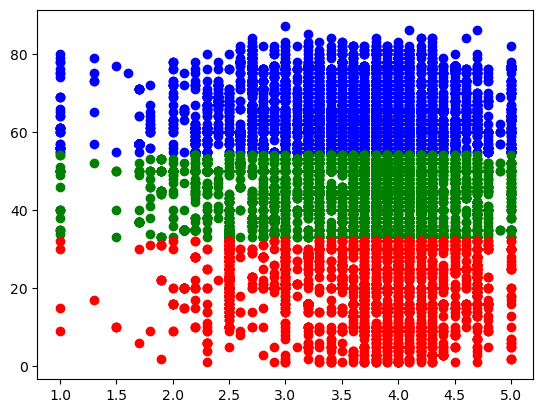

In [217]:
plt.scatter(df1['average_rating'],df1['discount_in_percentage'],color='blue')
plt.scatter(df2['average_rating'],df2['discount_in_percentage'],color='green')
plt.scatter(df3['average_rating'],df3['discount_in_percentage'],color='red')

In [218]:
#moderate discount i.e. cluster 2 offer a more efficient stratergy


In [234]:
x=df[['average_rating','actual_price','selling_price']]
y=df['discount_in_percentage']

In [235]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [236]:
model=LinearRegression()

In [237]:
model.fit(x,y)

LinearRegression()

In [238]:
y_pred=model.predict(x_test)

In [239]:
mse=mean_squared_error(y_test,y_pred)

In [240]:
rmse= np.sqrt(mse)
rmse

9.01913408777546

In [241]:
r2_score(y_test,y_pred)

0.7123475150655316

In [243]:
# accurate prediction, since rmse less than 10 and r_soce > 0.7 which is great in real terms